In [1]:
# Initialize required random seeds before importing anything else.
import random

import numpy as np
from tensorflow import set_random_seed

np.random.seed(42)
set_random_seed(42)
random.seed(42)

/home/qkt/.local/share/virtualenvs/sgan-techniques-WxACZbr4/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

import json

from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import learning_curve

import sgantech as sgt

Using TensorFlow backend.


In [3]:
sns.set_style('whitegrid')
color_palette = sns.color_palette()

In [4]:
(x_train, y_train), (x_test, y_test) = sgt.utils.load_preprocessed_mnist()
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [5]:
training_steps = [
    50,
    100,
    200,
    300,
    400,
    500,
    600,
    700,
    800,
    900,
    1000,
    1500,
    2000,
    5000,
    10000,
    15000,
    20000,
    25000,
    30000,
    40000,
    50000,
    60000,
]

In [6]:
def create_dense():
    baseline_dense_network = sgt.supervised.dense((28, 28, 1), 10)
    baseline_dense_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return baseline_dense_network

def create_cnn():
    baseline_cnn_network = sgt.supervised.cnn((28, 28, 1), 10)
    baseline_cnn_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return baseline_cnn_network

In [7]:
def plot_learning_curve_to_axis(ax, train_sizes, train_scores, test_scores, set_ylabel=True):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    for i in range(1, 4):
        ax.fill_between(
            train_sizes,
            train_scores_mean - i * train_scores_std,
            train_scores_mean + i * train_scores_std,
            alpha=(0.3 / i)
        )
        ax.fill_between(
            train_sizes,
            test_scores_mean - i * test_scores_std,
            test_scores_mean + i * test_scores_std,
            alpha=(0.3 / i)
        )
    ax.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    
    ax.set_xlabel('Training Examples')
    if set_ylabel:
        ax.set_ylabel('Accuracy (%)')
    ax.legend(loc="best")
    return ax

In [8]:
dense_clf = KerasClassifier(build_fn=create_dense, epochs=10, batch_size=64)
dense_train_sizes, dense_train_scores, dense_test_scores = learning_curve(
    dense_clf, X, y, train_sizes=training_steps, cv=7, random_state=42
)

Epoch 1/10
50/50 [==============================] - 1s 11ms/step - loss: 2.5953 - acc: 0.0400
Epoch 2/10
50/50 [==============================] - 0s 67us/step - loss: 2.0643 - acc: 0.3000
Epoch 3/10
50/50 [==============================] - 0s 59us/step - loss: 1.3110 - acc: 0.7200
Epoch 4/10
50/50 [==============================] - 0s 54us/step - loss: 0.7735 - acc: 0.8600
Epoch 5/10
50/50 [==============================] - 0s 54us/step - loss: 0.6193 - acc: 0.8400
Epoch 6/10
50/50 [==============================] - 0s 71us/step - loss: 0.3590 - acc: 0.9400
Epoch 7/10
50/50 [==============================] - 0s 71us/step - loss: 0.2194 - acc: 0.9800
Epoch 8/10
50/50 [==============================] - 0s 69us/step - loss: 0.1227 - acc: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 61us/step - loss: 0.0817 - acc: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 19us/step
Epoch 1/10
100/100 [==============================] - 0s 2ms/step - loss: 2.6608 - acc: 

Epoch 8/10
700/700 [==============================] - 0s 42us/step - loss: 0.0589 - acc: 0.9900
Epoch 9/10
700/700 [==============================] - 0s 42us/step - loss: 0.0575 - acc: 0.9843
Epoch 10/10
700/700 [==============================] - 0s 16us/step
Epoch 1/10
800/800 [==============================] - 0s 413us/step - loss: 1.4641 - acc: 0.5225
Epoch 2/10
800/800 [==============================] - 0s 43us/step - loss: 0.4419 - acc: 0.8513
Epoch 3/10
800/800 [==============================] - 0s 40us/step - loss: 0.2741 - acc: 0.9062
Epoch 4/10
800/800 [==============================] - 0s 43us/step - loss: 0.1742 - acc: 0.9450
Epoch 5/10
800/800 [==============================] - 0s 42us/step - loss: 0.1108 - acc: 0.9725
Epoch 6/10
800/800 [==============================] - 0s 41us/step - loss: 0.0747 - acc: 0.9888
Epoch 7/10
800/800 [==============================] - 0s 41us/step - loss: 0.0481 - acc: 0.9925
Epoch 8/10
800/800 [==============================] - 0s 42us/step 

15000/15000 [==============================] - 1s 38us/step - loss: 0.2244 - acc: 0.9307
Epoch 3/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.1741 - acc: 0.9457
Epoch 4/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.1208 - acc: 0.9650
Epoch 5/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.1061 - acc: 0.9657
Epoch 6/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.0909 - acc: 0.9692
Epoch 7/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.0904 - acc: 0.9699
Epoch 8/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.0706 - acc: 0.9767
Epoch 9/10
15000/15000 [==============================] - 1s 37us/step - loss: 0.0627 - acc: 0.9780
Epoch 10/10
15000/15000 [==============================] - 0s 14us/step
Epoch 1/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.4158 - acc: 0.8724
Epoch 2/10
20000/20000 [===============

Epoch 6/10
50/50 [==============================] - 0s 60us/step - loss: 0.5459 - acc: 0.9200
Epoch 7/10
50/50 [==============================] - 0s 60us/step - loss: 0.4794 - acc: 0.8600
Epoch 8/10
50/50 [==============================] - 0s 56us/step - loss: 0.2943 - acc: 0.9800
Epoch 9/10
50/50 [==============================] - 0s 65us/step - loss: 0.2033 - acc: 0.9800
Epoch 10/10
50/50 [==============================] - 0s 18us/step
Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 2.7089 - acc: 0.1200
Epoch 2/10
100/100 [==============================] - 0s 72us/step - loss: 1.8877 - acc: 0.3700
Epoch 3/10
100/100 [==============================] - 0s 63us/step - loss: 1.1710 - acc: 0.6600
Epoch 4/10
100/100 [==============================] - 0s 69us/step - loss: 0.7076 - acc: 0.9000
Epoch 5/10
100/100 [==============================] - 0s 65us/step - loss: 0.4599 - acc: 0.9300
Epoch 6/10
100/100 [==============================] - 0s 72us/step - loss: 0.32

15000/15000 [==============================] - 1s 40us/step - loss: 0.0971 - acc: 0.9676
Epoch 7/10
15000/15000 [==============================] - 1s 40us/step - loss: 0.0846 - acc: 0.9717
Epoch 8/10
15000/15000 [==============================] - 1s 40us/step - loss: 0.0859 - acc: 0.9715
Epoch 9/10
15000/15000 [==============================] - 1s 40us/step - loss: 0.0722 - acc: 0.9746
Epoch 10/10
15000/15000 [==============================] - 0s 15us/step
Epoch 1/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.4048 - acc: 0.8754
Epoch 2/10
20000/20000 [==============================] - 1s 40us/step - loss: 0.2060 - acc: 0.9375
Epoch 3/10
20000/20000 [==============================] - 1s 40us/step - loss: 0.1580 - acc: 0.9499
Epoch 4/10
20000/20000 [==============================] - 1s 40us/step - loss: 0.1256 - acc: 0.9591
Epoch 5/10
20000/20000 [==============================] - 1s 39us/step - loss: 0.1039 - acc: 0.9676
Epoch 6/10
20000/20000 [===============

50/50 [==============================] - 0s 24us/step
Epoch 1/10
100/100 [==============================] - 1s 12ms/step - loss: 2.6922 - acc: 0.0700
Epoch 2/10
100/100 [==============================] - 0s 75us/step - loss: 1.9744 - acc: 0.4000
Epoch 3/10
100/100 [==============================] - 0s 76us/step - loss: 1.4856 - acc: 0.5800
Epoch 4/10
100/100 [==============================] - 0s 71us/step - loss: 0.9047 - acc: 0.8500
Epoch 5/10
100/100 [==============================] - 0s 68us/step - loss: 0.5920 - acc: 0.8700
Epoch 6/10
100/100 [==============================] - 0s 71us/step - loss: 0.3375 - acc: 0.9300
Epoch 7/10
100/100 [==============================] - 0s 68us/step - loss: 0.2968 - acc: 0.9300
Epoch 8/10
100/100 [==============================] - 0s 79us/step - loss: 0.1362 - acc: 0.9900
Epoch 9/10
100/100 [==============================] - 0s 69us/step - loss: 0.1377 - acc: 0.9700
Epoch 10/10
100/100 [==============================] - 0s 32us/step
Epoch 1/10
200

15000/15000 [==============================] - 0s 20us/step
Epoch 1/10
20000/20000 [==============================] - 2s 119us/step - loss: 0.4198 - acc: 0.8730
Epoch 2/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1977 - acc: 0.9385
Epoch 3/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1626 - acc: 0.9506
Epoch 4/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1121 - acc: 0.9647
Epoch 5/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1076 - acc: 0.9659
Epoch 6/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.1008 - acc: 0.9688
Epoch 7/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.0846 - acc: 0.9722
Epoch 8/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.0699 - acc: 0.9774
Epoch 9/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.0632 - acc: 0.9789
Epoch 10/10
20000/20000 [==============

100/100 [==============================] - 0s 70us/step - loss: 0.6645 - acc: 0.8000
Epoch 5/10
100/100 [==============================] - 0s 64us/step - loss: 0.4672 - acc: 0.8900
Epoch 6/10
100/100 [==============================] - 0s 75us/step - loss: 0.2486 - acc: 0.9400
Epoch 7/10
100/100 [==============================] - 0s 71us/step - loss: 0.2224 - acc: 0.9500
Epoch 8/10
100/100 [==============================] - 0s 71us/step - loss: 0.1130 - acc: 0.9900
Epoch 9/10
100/100 [==============================] - 0s 75us/step - loss: 0.0951 - acc: 0.9800
Epoch 10/10
100/100 [==============================] - 0s 38us/step
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 2.4688 - acc: 0.1050
Epoch 2/10
200/200 [==============================] - 0s 69us/step - loss: 1.5882 - acc: 0.5450
Epoch 3/10
200/200 [==============================] - 0s 72us/step - loss: 0.8290 - acc: 0.7300
Epoch 4/10
200/200 [==============================] - 0s 72us/step - loss: 0.694

800/800 [==============================] - 0s 28us/step
Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 1.4828 - acc: 0.4922
Epoch 2/10
900/900 [==============================] - 0s 49us/step - loss: 0.6597 - acc: 0.8044
Epoch 3/10
900/900 [==============================] - 0s 48us/step - loss: 0.4590 - acc: 0.8656
Epoch 4/10
900/900 [==============================] - 0s 51us/step - loss: 0.3659 - acc: 0.8889
Epoch 5/10
900/900 [==============================] - 0s 50us/step - loss: 0.3019 - acc: 0.9122
Epoch 6/10
900/900 [==============================] - 0s 49us/step - loss: 0.1858 - acc: 0.9400
Epoch 7/10
900/900 [==============================] - 0s 48us/step - loss: 0.1814 - acc: 0.9500
Epoch 8/10
900/900 [==============================] - 0s 49us/step - loss: 0.1223 - acc: 0.9589
Epoch 9/10
900/900 [==============================] - 0s 50us/step - loss: 0.0950 - acc: 0.9800
Epoch 10/10
900/900 [==============================] - 0s 28us/step
Epoch 1/10
10

100/100 [==============================] - 0s 87us/step - loss: 0.1608 - acc: 0.9800
Epoch 9/10
100/100 [==============================] - 0s 109us/step - loss: 0.0886 - acc: 1.0000
Epoch 10/10
100/100 [==============================] - 0s 44us/step
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 2.5392 - acc: 0.2400
Epoch 2/10
200/200 [==============================] - 0s 81us/step - loss: 1.3081 - acc: 0.5750
Epoch 3/10
200/200 [==============================] - 0s 76us/step - loss: 0.8153 - acc: 0.7550
Epoch 4/10
200/200 [==============================] - 0s 77us/step - loss: 0.6007 - acc: 0.8200
Epoch 5/10
200/200 [==============================] - 0s 76us/step - loss: 0.4826 - acc: 0.8550
Epoch 6/10
200/200 [==============================] - 0s 74us/step - loss: 0.2779 - acc: 0.9200
Epoch 7/10
200/200 [==============================] - 0s 78us/step - loss: 0.2546 - acc: 0.9150
Epoch 8/10
200/200 [==============================] - 0s 80us/step - loss: 0.1

20000/20000 [==============================] - 1s 49us/step - loss: 0.0814 - acc: 0.9745
Epoch 8/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.0749 - acc: 0.9753
Epoch 9/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.0762 - acc: 0.9749
Epoch 10/10
20000/20000 [==============================] - 1s 27us/step
Epoch 1/10
25000/25000 [==============================] - 4s 158us/step - loss: 0.3847 - acc: 0.8842
Epoch 2/10
25000/25000 [==============================] - 1s 48us/step - loss: 0.1933 - acc: 0.9405
Epoch 3/10
25000/25000 [==============================] - 1s 49us/step - loss: 0.1389 - acc: 0.9557
Epoch 4/10
25000/25000 [==============================] - 1s 49us/step - loss: 0.1180 - acc: 0.9644
Epoch 5/10
25000/25000 [==============================] - 1s 49us/step - loss: 0.1083 - acc: 0.9666
Epoch 6/10
25000/25000 [==============================] - 1s 49us/step - loss: 0.0902 - acc: 0.9705
Epoch 7/10
25000/25000 [==============

900/900 [==============================] - 0s 58us/step - loss: 0.1813 - acc: 0.9467
Epoch 7/10
900/900 [==============================] - 0s 57us/step - loss: 0.1373 - acc: 0.9600
Epoch 8/10
900/900 [==============================] - 0s 58us/step - loss: 0.1607 - acc: 0.9444
Epoch 9/10
900/900 [==============================] - 0s 57us/step - loss: 0.1073 - acc: 0.9700
Epoch 10/10
900/900 [==============================] - 0s 31us/step
Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.5440 - acc: 0.5150
Epoch 2/10
1000/1000 [==============================] - 0s 57us/step - loss: 0.5586 - acc: 0.8360
Epoch 3/10
1000/1000 [==============================] - 0s 55us/step - loss: 0.3764 - acc: 0.8790
Epoch 4/10
1000/1000 [==============================] - 0s 53us/step - loss: 0.2709 - acc: 0.9200
Epoch 5/10
1000/1000 [==============================] - 0s 53us/step - loss: 0.2038 - acc: 0.9370
Epoch 6/10
1000/1000 [==============================] - 0s 54us/step -

200/200 [==============================] - 0s 93us/step - loss: 0.7296 - acc: 0.8050
Epoch 4/10
200/200 [==============================] - 0s 105us/step - loss: 0.5490 - acc: 0.8550
Epoch 5/10
200/200 [==============================] - 0s 104us/step - loss: 0.3525 - acc: 0.8950
Epoch 6/10
200/200 [==============================] - 0s 91us/step - loss: 0.2729 - acc: 0.9200
Epoch 7/10
200/200 [==============================] - 0s 91us/step - loss: 0.2167 - acc: 0.9200
Epoch 8/10
200/200 [==============================] - 0s 94us/step - loss: 0.1475 - acc: 0.9550
Epoch 9/10
200/200 [==============================] - 0s 87us/step - loss: 0.1130 - acc: 0.9600
Epoch 10/10
200/200 [==============================] - 0s 48us/step
Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 2.1655 - acc: 0.2867
Epoch 2/10
300/300 [==============================] - 0s 71us/step - loss: 0.8865 - acc: 0.7200
Epoch 3/10
300/300 [==============================] - 0s 79us/step - loss: 0.

25000/25000 [==============================] - 1s 59us/step - loss: 0.1913 - acc: 0.9420
Epoch 3/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.1463 - acc: 0.9541
Epoch 4/10
25000/25000 [==============================] - 1s 58us/step - loss: 0.1171 - acc: 0.9640
Epoch 5/10
25000/25000 [==============================] - 1s 58us/step - loss: 0.1056 - acc: 0.9662
Epoch 6/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.0949 - acc: 0.9682
Epoch 7/10
25000/25000 [==============================] - 1s 58us/step - loss: 0.0759 - acc: 0.9757
Epoch 8/10
25000/25000 [==============================] - 1s 58us/step - loss: 0.0737 - acc: 0.9763
Epoch 9/10
25000/25000 [==============================] - 1s 58us/step - loss: 0.0710 - acc: 0.9778
Epoch 10/10
25000/25000 [==============================] - 1s 33us/step
Epoch 1/10
30000/30000 [==============================] - 6s 194us/step - loss: 0.3678 - acc: 0.8873
Epoch 2/10
30000/30000 [==============

In [9]:
cnn_clf = KerasClassifier(build_fn=create_cnn, epochs=10, batch_size=64)
cnn_train_sizes, cnn_train_scores, cnn_test_scores = learning_curve(
    cnn_clf, X, y, train_sizes=training_steps, cv=7, random_state=42
)

Epoch 1/10
50/50 [==============================] - 5s 96ms/step - loss: 2.6386 - acc: 0.1000
Epoch 2/10
50/50 [==============================] - 0s 205us/step - loss: 2.1835 - acc: 0.2600
Epoch 3/10
50/50 [==============================] - 0s 251us/step - loss: 1.7219 - acc: 0.3800
Epoch 4/10
50/50 [==============================] - 0s 218us/step - loss: 1.3853 - acc: 0.5200
Epoch 5/10
50/50 [==============================] - 0s 255us/step - loss: 0.9592 - acc: 0.7600
Epoch 6/10
50/50 [==============================] - 0s 220us/step - loss: 0.6655 - acc: 0.8400
Epoch 7/10
50/50 [==============================] - 0s 226us/step - loss: 0.6216 - acc: 0.8800
Epoch 8/10
50/50 [==============================] - 0s 209us/step - loss: 0.4320 - acc: 0.9200
Epoch 9/10
50/50 [==============================] - 0s 219us/step - loss: 0.2392 - acc: 0.9800
Epoch 10/10
50/50 [==============================] - 0s 145us/step
Epoch 1/10
100/100 [==============================] - 5s 46ms/step - loss: 2.51

10000/10000 [==============================] - 1s 69us/step
Epoch 1/10
15000/15000 [==============================] - 8s 552us/step - loss: 0.4954 - acc: 0.8431
Epoch 2/10
15000/15000 [==============================] - 3s 169us/step - loss: 0.2115 - acc: 0.9370
Epoch 3/10
15000/15000 [==============================] - 3s 168us/step - loss: 0.1609 - acc: 0.9498
Epoch 4/10
15000/15000 [==============================] - 3s 170us/step - loss: 0.1266 - acc: 0.9624
Epoch 5/10
15000/15000 [==============================] - 3s 168us/step - loss: 0.1200 - acc: 0.9629
Epoch 6/10
15000/15000 [==============================] - 3s 169us/step - loss: 0.0932 - acc: 0.9721
Epoch 7/10
15000/15000 [==============================] - 3s 168us/step - loss: 0.0862 - acc: 0.9735
Epoch 8/10
15000/15000 [==============================] - 3s 169us/step - loss: 0.1025 - acc: 0.9716
Epoch 9/10
15000/15000 [==============================] - 3s 169us/step - loss: 0.0887 - acc: 0.9750
Epoch 10/10
15000/15000 [======

Epoch 4/10
50/50 [==============================] - 0s 239us/step - loss: 1.4529 - acc: 0.5400
Epoch 5/10
50/50 [==============================] - 0s 255us/step - loss: 1.0462 - acc: 0.7400
Epoch 6/10
50/50 [==============================] - 0s 246us/step - loss: 0.8376 - acc: 0.8000
Epoch 7/10
50/50 [==============================] - 0s 227us/step - loss: 0.6504 - acc: 0.8600
Epoch 8/10
50/50 [==============================] - 0s 217us/step - loss: 0.4419 - acc: 0.9200
Epoch 9/10
50/50 [==============================] - 0s 230us/step - loss: 0.3423 - acc: 0.9400
Epoch 10/10
50/50 [==============================] - 0s 99us/step
Epoch 1/10
100/100 [==============================] - 7s 66ms/step - loss: 2.4294 - acc: 0.1100
Epoch 2/10
100/100 [==============================] - 0s 221us/step - loss: 1.5916 - acc: 0.5200
Epoch 3/10
100/100 [==============================] - 0s 239us/step - loss: 1.0540 - acc: 0.6800
Epoch 4/10
100/100 [==============================] - 0s 233us/step - loss

15000/15000 [==============================] - 3s 184us/step - loss: 0.1534 - acc: 0.9547
Epoch 4/10
15000/15000 [==============================] - 3s 184us/step - loss: 0.1375 - acc: 0.9600
Epoch 5/10
15000/15000 [==============================] - 3s 182us/step - loss: 0.1057 - acc: 0.9679
Epoch 6/10
15000/15000 [==============================] - 3s 183us/step - loss: 0.1076 - acc: 0.9697
Epoch 7/10
15000/15000 [==============================] - 3s 182us/step - loss: 0.1062 - acc: 0.9695
Epoch 8/10
15000/15000 [==============================] - 3s 182us/step - loss: 0.0960 - acc: 0.9733
Epoch 9/10
15000/15000 [==============================] - 3s 182us/step - loss: 0.0748 - acc: 0.9789
Epoch 10/10
15000/15000 [==============================] - 1s 86us/step
Epoch 1/10
20000/20000 [==============================] - 12s 580us/step - loss: 0.4192 - acc: 0.8695
Epoch 2/10
20000/20000 [==============================] - 4s 183us/step - loss: 0.1895 - acc: 0.9451
Epoch 3/10
20000/20000 [=====

Epoch 6/10
50/50 [==============================] - 0s 251us/step - loss: 0.7143 - acc: 0.8400
Epoch 7/10
50/50 [==============================] - 0s 273us/step - loss: 0.5662 - acc: 0.9400
Epoch 8/10
50/50 [==============================] - 0s 263us/step - loss: 0.4977 - acc: 0.8600
Epoch 9/10
50/50 [==============================] - 0s 246us/step - loss: 0.3207 - acc: 0.9400
Epoch 10/10
50/50 [==============================] - 0s 124us/step
Epoch 1/10
100/100 [==============================] - 9s 87ms/step - loss: 2.6070 - acc: 0.1200
Epoch 2/10
100/100 [==============================] - 0s 240us/step - loss: 1.8338 - acc: 0.3800
Epoch 3/10
100/100 [==============================] - 0s 247us/step - loss: 1.0925 - acc: 0.6900
Epoch 4/10
100/100 [==============================] - 0s 253us/step - loss: 0.8024 - acc: 0.7400
Epoch 5/10
100/100 [==============================] - 0s 240us/step - loss: 0.5296 - acc: 0.8800
Epoch 6/10
100/100 [==============================] - 0s 273us/step -

15000/15000 [==============================] - 3s 201us/step - loss: 0.1214 - acc: 0.9643
Epoch 5/10
15000/15000 [==============================] - 3s 201us/step - loss: 0.1149 - acc: 0.9665
Epoch 6/10
15000/15000 [==============================] - 3s 199us/step - loss: 0.1009 - acc: 0.9701
Epoch 7/10
15000/15000 [==============================] - 3s 200us/step - loss: 0.1007 - acc: 0.9705
Epoch 8/10
15000/15000 [==============================] - 3s 201us/step - loss: 0.0957 - acc: 0.9729
Epoch 9/10
15000/15000 [==============================] - 3s 200us/step - loss: 0.0881 - acc: 0.9733
Epoch 10/10
15000/15000 [==============================] - 2s 100us/step
Epoch 1/10
20000/20000 [==============================] - 15s 732us/step - loss: 0.4278 - acc: 0.8679
Epoch 2/10
20000/20000 [==============================] - 4s 202us/step - loss: 0.1879 - acc: 0.9463
Epoch 3/10
20000/20000 [==============================] - 4s 200us/step - loss: 0.1417 - acc: 0.9593
Epoch 4/10
20000/20000 [====

Epoch 7/10
50/50 [==============================] - 0s 272us/step - loss: 0.4861 - acc: 0.9000
Epoch 8/10
50/50 [==============================] - 0s 261us/step - loss: 0.3937 - acc: 0.9000
Epoch 9/10
50/50 [==============================] - 0s 261us/step - loss: 0.2758 - acc: 0.9400
Epoch 10/10
50/50 [==============================] - 0s 143us/step
Epoch 1/10
100/100 [==============================] - 11s 110ms/step - loss: 2.5859 - acc: 0.0800
Epoch 2/10
100/100 [==============================] - 0s 262us/step - loss: 1.8372 - acc: 0.4000
Epoch 3/10
100/100 [==============================] - 0s 269us/step - loss: 1.2804 - acc: 0.6000
Epoch 4/10
100/100 [==============================] - 0s 263us/step - loss: 0.9824 - acc: 0.7100
Epoch 5/10
100/100 [==============================] - 0s 275us/step - loss: 0.6383 - acc: 0.7900
Epoch 6/10
100/100 [==============================] - 0s 276us/step - loss: 0.4406 - acc: 0.8700
Epoch 7/10
100/100 [==============================] - 0s 286us/st

15000/15000 [==============================] - 3s 215us/step - loss: 0.1092 - acc: 0.9671
Epoch 6/10
15000/15000 [==============================] - 3s 216us/step - loss: 0.1116 - acc: 0.9669
Epoch 7/10
15000/15000 [==============================] - 3s 216us/step - loss: 0.0947 - acc: 0.9731
Epoch 8/10
15000/15000 [==============================] - 3s 217us/step - loss: 0.0952 - acc: 0.9712
Epoch 9/10
15000/15000 [==============================] - 3s 216us/step - loss: 0.0997 - acc: 0.9729
Epoch 10/10
15000/15000 [==============================] - 2s 112us/step
Epoch 1/10
20000/20000 [==============================] - 17s 857us/step - loss: 0.4156 - acc: 0.8722
Epoch 2/10
20000/20000 [==============================] - 4s 216us/step - loss: 0.1903 - acc: 0.9446
Epoch 3/10
20000/20000 [==============================] - 4s 216us/step - loss: 0.1382 - acc: 0.9608
Epoch 4/10
20000/20000 [==============================] - 4s 216us/step - loss: 0.1151 - acc: 0.9666
Epoch 5/10
20000/20000 [====

Epoch 8/10
50/50 [==============================] - 0s 309us/step - loss: 0.6152 - acc: 0.8200
Epoch 9/10
50/50 [==============================] - 0s 281us/step - loss: 0.4426 - acc: 0.8600
Epoch 10/10
50/50 [==============================] - 0s 156us/step
Epoch 1/10
100/100 [==============================] - 14s 137ms/step - loss: 2.3936 - acc: 0.1500
Epoch 2/10
100/100 [==============================] - 0s 307us/step - loss: 1.6993 - acc: 0.3900
Epoch 3/10
100/100 [==============================] - 0s 294us/step - loss: 1.0300 - acc: 0.7000
Epoch 4/10
100/100 [==============================] - 0s 288us/step - loss: 0.7308 - acc: 0.7800
Epoch 5/10
100/100 [==============================] - 0s 288us/step - loss: 0.4163 - acc: 0.9200
Epoch 6/10
100/100 [==============================] - 0s 296us/step - loss: 0.3091 - acc: 0.9200
Epoch 7/10
100/100 [==============================] - 0s 295us/step - loss: 0.1779 - acc: 0.9800
Epoch 8/10
100/100 [==============================] - 0s 310us/

15000/15000 [==============================] - 3s 231us/step - loss: 0.1090 - acc: 0.9690
Epoch 7/10
15000/15000 [==============================] - 3s 232us/step - loss: 0.0923 - acc: 0.9724
Epoch 8/10
15000/15000 [==============================] - 3s 231us/step - loss: 0.0830 - acc: 0.9759
Epoch 9/10
15000/15000 [==============================] - 3s 232us/step - loss: 0.1007 - acc: 0.9724
Epoch 10/10
15000/15000 [==============================] - 2s 127us/step
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.4338 - acc: 0.8672
Epoch 2/10
20000/20000 [==============================] - 5s 232us/step - loss: 0.1827 - acc: 0.9467
Epoch 3/10
20000/20000 [==============================] - 5s 232us/step - loss: 0.1384 - acc: 0.9578
Epoch 4/10
20000/20000 [==============================] - 5s 232us/step - loss: 0.1261 - acc: 0.9621
Epoch 5/10
20000/20000 [==============================] - 5s 231us/step - loss: 0.1039 - acc: 0.9709
Epoch 6/10
20000/20000 [======

Epoch 9/10
50/50 [==============================] - 0s 305us/step - loss: 0.2346 - acc: 0.9800
Epoch 10/10
50/50 [==============================] - 0s 173us/step
Epoch 1/10
100/100 [==============================] - 17s 166ms/step - loss: 2.4834 - acc: 0.0900
Epoch 2/10
100/100 [==============================] - 0s 290us/step - loss: 1.6810 - acc: 0.4600
Epoch 3/10
100/100 [==============================] - 0s 315us/step - loss: 1.0890 - acc: 0.6900
Epoch 4/10
100/100 [==============================] - 0s 312us/step - loss: 0.7211 - acc: 0.7700
Epoch 5/10
100/100 [==============================] - 0s 310us/step - loss: 0.5189 - acc: 0.8600
Epoch 6/10
100/100 [==============================] - 0s 364us/step - loss: 0.2857 - acc: 0.9600
Epoch 7/10
100/100 [==============================] - 0s 313us/step - loss: 0.2026 - acc: 0.9400
Epoch 8/10
100/100 [==============================] - 0s 319us/step - loss: 0.1458 - acc: 0.9600
Epoch 9/10
100/100 [==============================] - 0s 317u

15000/15000 [==============================] - 4s 245us/step - loss: 0.1033 - acc: 0.9707
Epoch 8/10
15000/15000 [==============================] - 4s 244us/step - loss: 0.0935 - acc: 0.9727
Epoch 9/10
15000/15000 [==============================] - 4s 244us/step - loss: 0.0828 - acc: 0.9766
Epoch 10/10
15000/15000 [==============================] - 2s 141us/step
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4358 - acc: 0.8646
Epoch 2/10
20000/20000 [==============================] - 5s 246us/step - loss: 0.1789 - acc: 0.9480
Epoch 3/10
20000/20000 [==============================] - 5s 244us/step - loss: 0.1363 - acc: 0.9600
Epoch 4/10
20000/20000 [==============================] - 5s 245us/step - loss: 0.1146 - acc: 0.9660
Epoch 5/10
20000/20000 [==============================] - 5s 245us/step - loss: 0.1125 - acc: 0.9683
Epoch 6/10
20000/20000 [==============================] - 5s 244us/step - loss: 0.1046 - acc: 0.9698
Epoch 7/10
20000/20000 [======

Epoch 10/10
50/50 [==============================] - 0s 185us/step
Epoch 1/10
100/100 [==============================] - 20s 196ms/step - loss: 2.3892 - acc: 0.1900
Epoch 2/10
100/100 [==============================] - 0s 309us/step - loss: 1.5937 - acc: 0.5500
Epoch 3/10
100/100 [==============================] - 0s 334us/step - loss: 1.1697 - acc: 0.6300
Epoch 4/10
100/100 [==============================] - 0s 325us/step - loss: 0.7600 - acc: 0.8000
Epoch 5/10
100/100 [==============================] - 0s 350us/step - loss: 0.4950 - acc: 0.8600
Epoch 6/10
100/100 [==============================] - 0s 358us/step - loss: 0.3610 - acc: 0.9200
Epoch 7/10
100/100 [==============================] - 0s 327us/step - loss: 0.2715 - acc: 0.9500
Epoch 8/10
100/100 [==============================] - 0s 319us/step - loss: 0.1837 - acc: 0.9600
Epoch 9/10
100/100 [==============================] - 0s 335us/step - loss: 0.1052 - acc: 0.9900
Epoch 10/10
100/100 [==============================] - 0s 1

15000/15000 [==============================] - 4s 260us/step - loss: 0.0847 - acc: 0.9751
Epoch 9/10
15000/15000 [==============================] - 4s 261us/step - loss: 0.0849 - acc: 0.9771
Epoch 10/10
15000/15000 [==============================] - 2s 152us/step
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4257 - acc: 0.8685
Epoch 2/10
20000/20000 [==============================] - 5s 262us/step - loss: 0.1969 - acc: 0.9431
Epoch 3/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.1518 - acc: 0.9564
Epoch 4/10
20000/20000 [==============================] - 5s 262us/step - loss: 0.1180 - acc: 0.9649
Epoch 5/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.1069 - acc: 0.9673
Epoch 6/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.0908 - acc: 0.9728
Epoch 7/10
20000/20000 [==============================] - 5s 261us/step - loss: 0.0953 - acc: 0.9723
Epoch 8/10
20000/20000 [======

In [10]:
dense_train_scores.shape, dense_test_scores.shape

((22, 7), (22, 7))

In [11]:
np.mean(dense_train_scores, axis=1)

array([0.99428572, 0.99714286, 0.985     , 1.        , 0.99392857,
       0.99571429, 0.9952381 , 0.99489796, 0.99696429, 0.98349206,
       0.99128571, 0.98819048, 0.98864286, 0.98211429, 0.98212857,
       0.98455238, 0.97637857, 0.98193714, 0.97588571, 0.97731786,
       0.98124857, 0.98452619])

In [12]:
np.mean(dense_test_scores, axis=1)

array([0.60548571, 0.66345714, 0.7221    , 0.79421429, 0.80951429,
       0.82408571, 0.83778571, 0.85311429, 0.86251429, 0.85907143,
       0.86361429, 0.88117143, 0.89521429, 0.92361429, 0.9445    ,
       0.95385714, 0.95015714, 0.96018571, 0.9564    , 0.96181429,
       0.96861429, 0.97222857])

In [13]:
np.mean(cnn_train_scores, axis=1)

array([1.        , 1.        , 0.99      , 0.99857143, 0.99714286,
       0.99828571, 0.99785714, 0.99367347, 0.99839286, 0.99095238,
       0.99642857, 0.99619048, 0.9935    , 0.9914    , 0.98947143,
       0.9908381 , 0.98974286, 0.99104   , 0.99026667, 0.99138929,
       0.99258857, 0.993     ])

In [14]:
np.mean(cnn_test_scores, axis=1)

array([0.59224286, 0.66834286, 0.73537143, 0.80632857, 0.82898571,
       0.85385714, 0.87234286, 0.87795714, 0.8951    , 0.88988571,
       0.902     , 0.92575714, 0.93451429, 0.96054286, 0.97012857,
       0.97557143, 0.97795714, 0.98002857, 0.98167143, 0.98424286,
       0.98548571, 0.98698571])

Text(0.5,1,'Baseline CNN Learning Curve (MNIST)')

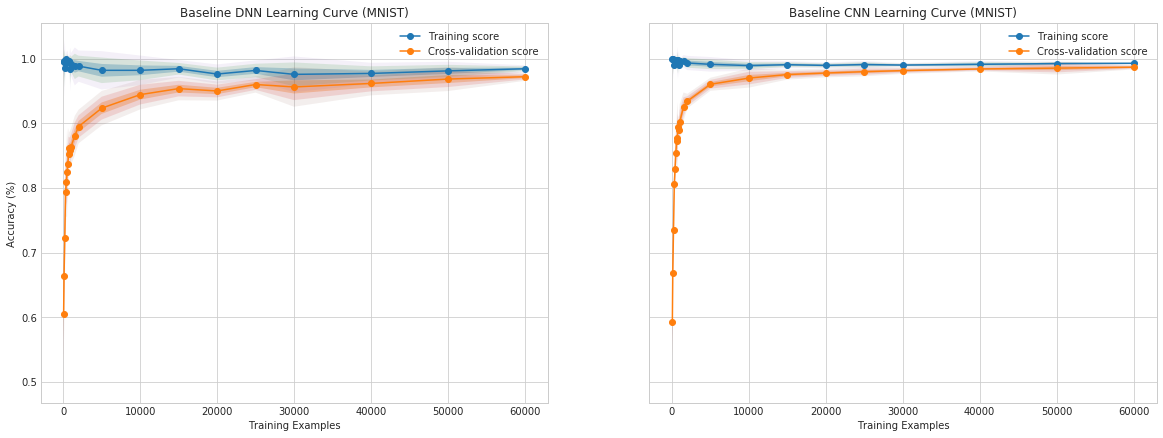

In [15]:
fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
plot_learning_curve_to_axis(left_ax, dense_train_sizes, dense_train_scores, dense_test_scores)
left_ax.set_title('Baseline DNN Learning Curve (MNIST)')

plot_learning_curve_to_axis(right_ax, cnn_train_sizes, cnn_train_scores, cnn_test_scores, set_ylabel=False)
right_ax.set_title('Baseline CNN Learning Curve (MNIST)')

Text(0.5,1,'Baseline CNN Learning Curve (MNIST)')

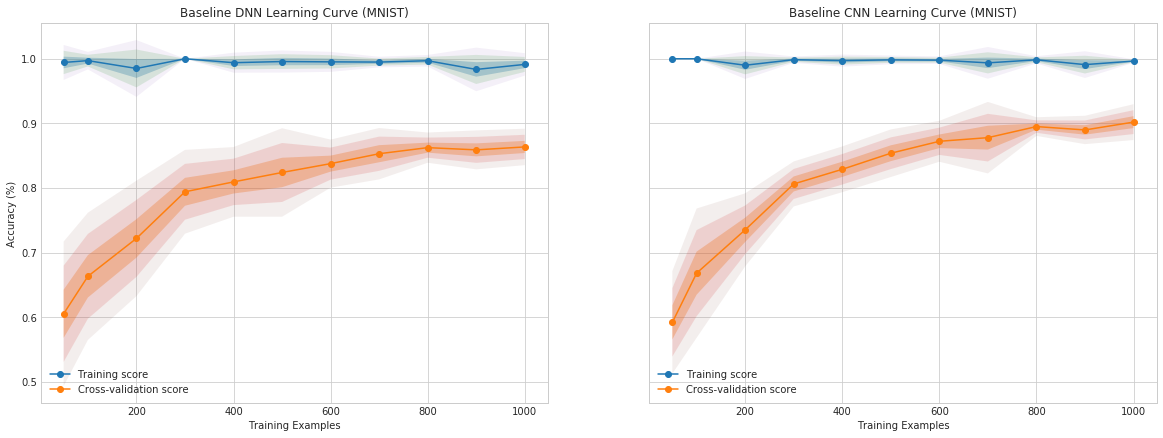

In [16]:
dense_idx = dense_train_sizes <= 1000
cnn_idx = cnn_train_sizes <= 1000

fig, (left_ax, right_ax) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
plot_learning_curve_to_axis(
    left_ax, dense_train_sizes[dense_idx], dense_train_scores[dense_idx], dense_test_scores[dense_idx]
)
left_ax.set_title('Baseline DNN Learning Curve (MNIST)')

plot_learning_curve_to_axis(
    right_ax, cnn_train_sizes[cnn_idx], cnn_train_scores[cnn_idx], cnn_test_scores[cnn_idx], set_ylabel=False
)
right_ax.set_title('Baseline CNN Learning Curve (MNIST)')